In [2]:
from numpy import *

Un transformador monofásico de 250 kVA, 10000/420 V, Dy11, da los siguientes resultados en ensayos:

Un transformador monofásico de 125 kVA, 3000/380 V, 50 Hz ha dado los siguientes resultados en los ensayos de vacío y cortocircuito:


Ensayo | Devanado    | Tensión (V)  | Intensidad  (A)       | Potencia (W)         
-------|-------------|--------------|-----------------------|----------------
Vacío  | Primario    | 10000        |  0,6                  |  1000         
Corto  | Secundario  | 866          |   14,43               |   4164,


Determinar:

1. ¿Son los ensayos normalizados?
2. Parámetros del circuito equivalente aproximado referido al primario (fase-fase)
3. Caı́da de tensión unitaria a plena carga y factor de potencia 0.8 inductivo
4. Rendimiento para las condiciones del apartado c)
5. Rendimiento máximo


## 1. ¿Son los ensayos normalizados?

In [23]:
S_n = 250.0e3
U_1_n = 10000.0
U_2_n = 380.0

I_1_n = S_n/(sqrt(3)*U_1_n)
I_2_n = S_n/(sqrt(3)*U_2_n)
I_1_n

14.433756729740644

In [24]:
P_1_0 = 1000.0
I_1_0 = 0.6
U_1_0 = 10000

S_1_0 = sqrt(3)*I_1_0*U_1_0
phi_0 = arccos(P_1_0/S_1_0)

I_fe = I_1_0 * cos(phi_0)
I_mu = I_1_0 * sin(phi_0)

print('I_fe = {:2.3f} A'.format(I_fe)) 
print('I_mu = {:2.3f} A'.format(I_mu)) 

R_fe = U_1_0/sqrt(3)/I_fe
print('R_fe = {:2.3f} Ω'.format(R_fe)) 

X_mu = U_1_0/sqrt(3)/I_mu
print('X_mu = {:2.3f} Ω'.format(X_mu))

R_fe_ff = 3*R_fe
print('R_fe_ff = {:2.3f} Ω'.format(R_fe_ff)) 

X_mu_ff = 3*X_mu
print('X_mu_ff = {:2.3f} Ω'.format(X_mu_ff))

P_1_cc = 4164.5
I_1_cc = 14.43
U_1_cc = 866.0

S_1_cc = sqrt(3)*I_1_cc*U_1_cc
phi_cc = arccos(P_1_cc/S_1_cc)

Z_cc = U_1_cc/sqrt(3)/I_1_cc

R_cc = Z_cc*cos(phi_cc)
R_cc_ff = R_cc*3
print('R_cc_ff = {:2.5f}'.format(R_cc_ff)) 

X_cc = Z_cc*sin(phi_cc)
X_cc_ff = X_cc * 3
print('X_cc = {:2.5f}'.format(X_cc_ff))


I_fe = 0.058 A
I_mu = 0.597 A
R_fe = 100000.000 Ω
X_mu = 9667.365 Ω
R_fe_ff = 300000.000 Ω
X_mu_ff = 29002.095 Ω
R_cc_ff = 20.00001
X_cc = 102.00485


## 3. Caída de tensión unitaria a plena carga y factor de potencia 0.8 inductivo



In [25]:
e_cc = 866/10000
e_cc_r = e_cc*cos(phi_cc)
e_cc_x = e_cc*sin(phi_cc)

C = 1.0
phi_c = arccos(0.8)
e_c = C*(e_cc_r*cos(phi_c) + e_cc_x*sin(phi_c))

print('e_c = {:2.3f}'.format(e_c))

e_c = 0.064


In [26]:
e_cc_r

0.016662336770895337

In [27]:
6.667/400

0.0166675

In [6]:
P_0 = P_1_0
P_cc = P_1_cc
cos_phi = 0.8
rend_1 = C*S_n*cos_phi/(C*S_n*cos_phi + P_0 + C**2*P_cc)
print('rend_1 = {:2.2f} %'.format(rend_1*100))

rend_1 = 97.48 %


In [7]:
C = linspace(0,1,1000)
cos_phi = 1
Rend = C*S_n*cos_phi/(C*S_n*cos_phi + P_0 + C**2*P_cc)
rend_max = max(Rend)
print('rend_max = {:2.2f} %'.format(rend_max*100))

rend_max = 98.39 %


In [8]:
max(Rend)

0.98393655424656501

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


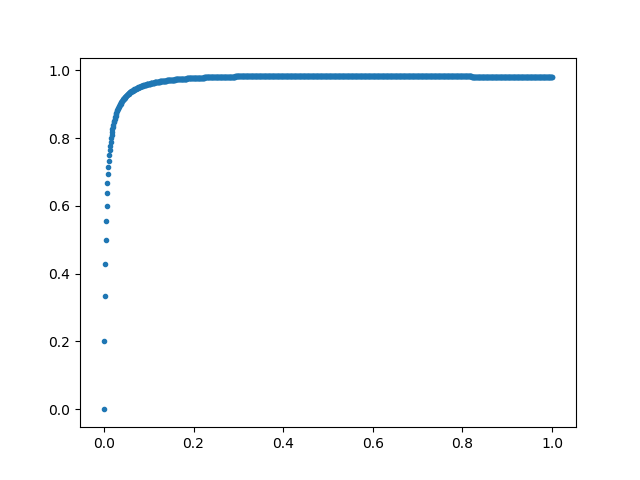

In [10]:
fig, ax = plt.subplots()
ax.scatter(C,Rend,marker=".")
fig.show()


In [12]:
import sympy as sym

In [13]:
c,S_n,cos_phi,P_0,P_cc = sym.symbols('c,S_n,cos_phi,P_0,P_cc')

rend_sym = c*S_n*cos_phi/(c*S_n*cos_phi + P_0 + c**2*P_cc)

In [14]:
dr=sym.simplify(rend_sym.diff('c'))

In [15]:
sym.solve(dr,c)

[-sqrt(P_0/P_cc), sqrt(P_0/P_cc)]

In [20]:
P_0 = P_1_0
P_cc = P_1_cc
S_n = 250.0e3
cos_phi = 1.0
c_rend_max = sqrt(P_0/P_cc)
S_rend_max = c_rend_max*S_n
rend_max = c_rend_max*S_n*cos_phi/(c_rend_max*S_n*cos_phi + P_0 + c_rend_max**2*P_cc)

In [21]:
c_rend_max

0.49002537172044824

In [22]:
rend_max

0.98393656135958762